<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problema-a-resolver" data-toc-modified-id="Problema-a-resolver-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problema a resolver</a></span></li><li><span><a href="#Aproximación-por-cuadrados-mínimos" data-toc-modified-id="Aproximación-por-cuadrados-mínimos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Aproximación por cuadrados mínimos</a></span></li><li><span><a href="#Problema-de-optimización" data-toc-modified-id="Problema-de-optimización-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Problema de optimización</a></span></li></ul></div>

In [18]:
from numpy import random
import decimal
import pandas as pd
import seaborn as sns
import numpy as np
random.seed(5)                 # Create a fixed state         
import matplotlib.pyplot as plt

from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from scipy.optimize import minimize

## Problema a resolver

Una persona dispone de tres escenarios distintos para invertir una cierta cantidad de dinero de manera de obtener la máxima ganancia posible (medida en transacciones). El problema consiste en **determinar la mejor combinación posible de Inversiones sobre cada uno de estos escenarios tal que la cantidad de Transacciones obtenidas sea máxima**. Para ello, se disponen de ciertas mediciones obtenidas en base a datos históricos de cada uno de estos escenarios que poseen la siguiente forma:

In [19]:
#Escenario 1
x1 = random.randint(5000, size=(100))
y1=x1*0.5 + 500*np.random.randn(100) +2000 #normal con menos varianza
escenario1 = pd.DataFrame({'Inversiones':x1, 'Transacciones':y1})

#Escenario 2
x2 = random.randint(5000, size=(100))
y2=x2*0.5 + 900*np.random.randn(100)+2000
escenario2 = pd.DataFrame({'Inversiones':x2, 'Transacciones':y2})

#Escenario 3
x3 = random.randint(5000, size=(100))
y3=x3*0.5 + 400*np.random.randn(100)+2000
escenario3 = pd.DataFrame({'Inversiones':x3, 'Transacciones':y3})

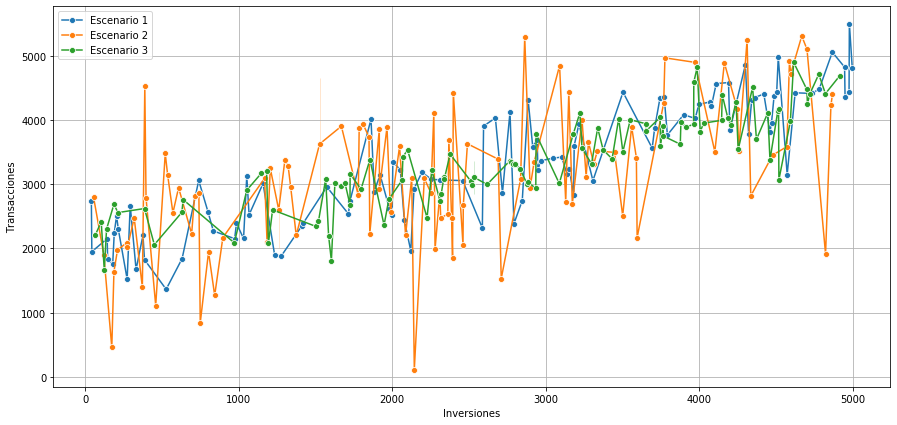

In [20]:
plt.figure(figsize=(15,7))
sns.lineplot(data=escenario1, x="Inversiones", y="Transacciones",marker='o',label='Escenario 1')
sns.lineplot(data=escenario2, x="Inversiones", y="Transacciones",marker='o',label='Escenario 2')
sns.lineplot(data=escenario3, x="Inversiones", y="Transacciones",marker='o',label='Escenario 3')
plt.legend()
plt.grid()
plt.show()

## Aproximación por cuadrados mínimos

La solución del problema implica el planteo de un problema de Optimización con restricciones pero previo a eso es pertinente aproximar los datos discretos por curvas continuas utilizando el método de **mínimos cuadrados**.

Esto significa que **Queremos encontrar c y a para aproximar la curva de cada escenario por algo de la forma:**


$
y =cx^a
$

De manera de convertir esta aproximación en un problema de cuadrados mínimos realizamos los siguientes cálculos:

$
\ln(y)=\ln(cx^a) = \ln(c)+ \ln(x^a)\\
\ln(y)= \ln(c)+a\ln(x)
$

Por lo tanto, vamos a encontrar $\textbf{ ln (c)}$ y $\textbf{a}$ como coeficientes del polinomio lineal de arriba para los datos de cada uno de los escenarios (luego en consecuencia $c= \exp(\ln(c))$).

In [21]:
def aproximation_function(data,escenario):
    x = np.log(data['Inversiones'])
    y = np.log(data['Transacciones'])
    p = np.polyfit(x,y,1)
    a = p[0]
    c = np.exp(p[1])
    sns.lineplot(x = data['Inversiones'],y = data['Transacciones'],ci=None,marker='o')
    x_values = np.arange(data['Inversiones'].min(),data['Transacciones'].max()+50,50)
    plt.plot( x_values,c*x_values**a)
    plt.grid()
    plt.suptitle(escenario,fontsize=15)
    plt.show()
    return a,c

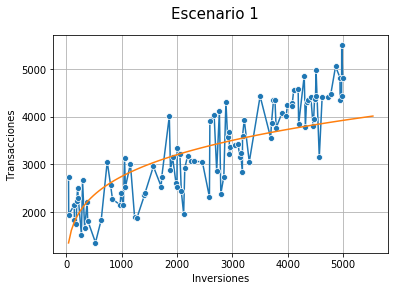

'Exponente: 0.22117275958935464'

'Factor: 596.5470660736764'

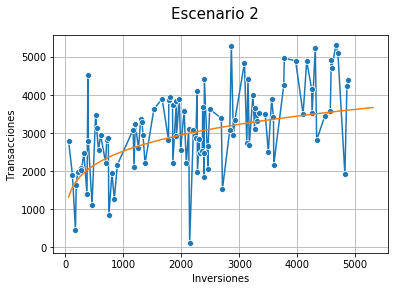

'Exponente: 0.2239212865356073'

'Factor: 0.2239212865356073'

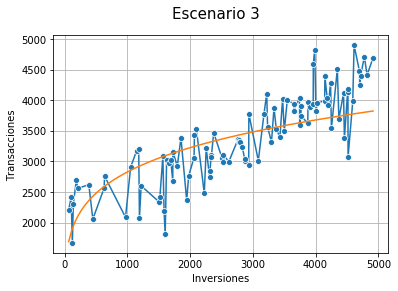

'Exponente: 0.1896774662883429'

'Factor: 762.2913150971841'

In [22]:
plt.figure()
a1,c1 = aproximation_function(escenario1,'Escenario 1')
display('Exponente: {}'.format(a1),'Factor: {}'.format(c1))

a2, c2 = aproximation_function(escenario2,'Escenario 2')
display('Exponente: {}'.format(a2),'Factor: {}'.format(a2))

a3, c3 = aproximation_function(escenario3, 'Escenario 3')
display('Exponente: {}'.format(a3),'Factor: {}'.format(c3))


Así, cada uno de datos discretos quedaron aproximados por las siguientes funciones:

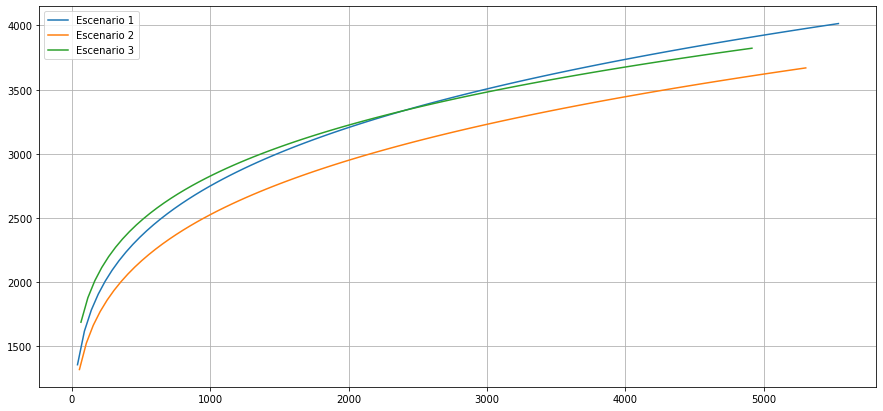

In [23]:
plt.figure(figsize=(15,7))
x1=np.arange(escenario1['Inversiones'].min(),escenario1['Transacciones'].max()+50,50)
plt.plot(x1, c1*x1**a1,label='Escenario 1')

x2=np.arange(escenario2['Inversiones'].min(),escenario2['Transacciones'].max()+50,50)
plt.plot(x2, c2*x2**a2,label='Escenario 2')

x3=np.arange(escenario3['Inversiones'].min(),escenario3['Transacciones'].max()+50,50)
plt.plot(x3, c3*x3**a3,label='Escenario 3')
plt.legend()
plt.grid()
plt.show()

In [24]:
def error_function(data,a,c): ##Error del metodo de cuadrados mínimos
    err = sum((data['Transacciones']-c*data['Inversiones']**a)**2)
    return err

In [25]:
err1 = error_function(escenario1,a1,c1)
print('Error datos Escenario 1:', err1)
err2 = error_function(escenario2,a2,c2)
print('Error datos Escenario 2:', err2)
err3 = error_function(escenario3,a3,c3)
print('Error datos Escenario 3:', err3)


Error datos Escenario 1: 35643960.51371657
Error datos Escenario 2: 88907843.95728533
Error datos Escenario 3: 21782557.70435053


## Problema de optimización

Volviendo a la situación planteada y teniendo las tres funciones de la forma de la $y=cx^a$, el problema a resolver consiste en maximizar la suma de cada una de ellas sujeto a un conjunto de restricciones, es decir:

$
\begin{equation}
\begin{aligned}
& \underset{x}{\text{minimizar}} & & f(x_1,x_2, x_3)=-(c_1x_1^{a_1}+c_2x_2^{a_2}+c_3x_3^{a_3}) \\
& \text{sujeto a} &  &  x_1+x_2+x_3 \leq 3500 \\
& &  &  0 \leq x_1 \leq  5000\\
 & &  &  0 \leq x_2 \leq  5000\\
& &  &  0 \leq x_3 \leq  5000\\
\end{aligned}
\end{equation}
$

con

$x_1$: Cantidad de dinero a invertir en Escenario 1.

$x_2$: Cantidad de dinero a invertir en Escenario 2.

$x_3$: Cantidad de dinero a invertir en Escenario 3.


Además en este caso se sumó la restricción sobre el presupuesto disponible para invertir ($3500).

Resolvemos el problema de optimización usando esta librería:


https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html

https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#trust-region-constrained-algorithm-method-trust-constr

Además necesitamos definir la siguiente información a partir de la función:

**Gradiente**

$
\begin{equation}
\nabla f(x_1,x_2,x_3) = \begin{pmatrix} - c_1a_1x_1^{(a_1-1)} \\- c_2a_2x_2^{(a_2-1)} \\- c_3a_3x_3^{(a_3-1)} \end{pmatrix}
\end{equation}
$

**Hessiana**


$
\begin{equation}
H_{f(x_1,x_2,x_3)} = \begin{pmatrix} - c_1a_1(a_1-1)x_1^{(a_1-2)}& 0 & 0  \\0 & - c_2a_2(a_2-1)x_2^{(a_2-2)}  & 0 \\0 & 0& - c_3a_3(a_3-1)x_3^{(a_3-2)} \end{pmatrix}
\end{equation}
$



In [26]:
max_spent= 3500
bounds = Bounds([0, 0,0], [5000,5000, 5000])
linear_constraint = LinearConstraint([1, 1, 1], [-np.inf], max_spent)
#Definicón de la función objetivo
def function(x):
    return -(c1*x[0]**a1 + c2*x[1]**a2 + c3*x[2]**a3)

In [27]:
#Definición del vector gradiente
def function_gradient(x):
    grad = np.zeros_like(x)
    grad[0] = - c1*a1*x[0]**(a1-1)
    grad[1] = - c2*a2*x[1]**(a2-1)
    grad[2] = - c3*a3*x[2]**(a3-1)
    return grad

In [28]:
#Definición de la matriz Hessiana
def function_hessian(x):    
    flatted_input = [- c1*a1*(a1-1)*x[0]**(a1-2),
                     - c2*a2*(a2-1)*x[1]**(a2-2), 
         -c3*a3*(a3-1)*x[2]**(a3-2)]
    hess = np.diagflat(flatted_input)
    return hess

In [29]:
#Definición del punto inicial
x0 = np.array([2000,2000,2000])

In [30]:
res = minimize(function, x0, method='trust-constr', 
               jac=function_gradient, 
               hess=function_hessian,
               constraints=[linear_constraint],
               options={'verbose': 1}, bounds=bounds)

`gtol` termination condition is satisfied.
Number of iterations: 433, function evaluations: 426, CG iterations: 432, optimality: 1.92e-13, constraint violation: 0.00e+00, execution time: 0.94 s.


In [31]:
x_opt = res.x
print('Combinación óptima de inversión a realizar: \n \n Escenario1: {} \n \n Escenario2: {} \n \n Escenario3: {}'.format(x_opt[0],x_opt[1],x_opt[2]))


Combinación óptima de inversión a realizar: 
 
 Escenario1: 1268.308685505764 
 
 Escenario2: 1156.0254582316009 
 
 Escenario3: 1075.6658537292003


In [32]:
print('Cantidad de transacciones obtenidas con la combinación óptima:',-function(x_opt))

Cantidad de transacciones obtenidas con la combinación óptima: 8370.93435478162
